In [140]:
setwd('/import/DB/workdir/cd40/')

In [141]:
library(Seurat)

In [142]:
sce = readRDS('ko3d.wt3d.cd40.rds')

In [143]:
Idents(sce) = 'seurat_clusters'

In [198]:
options(repr.plot.height = 7)

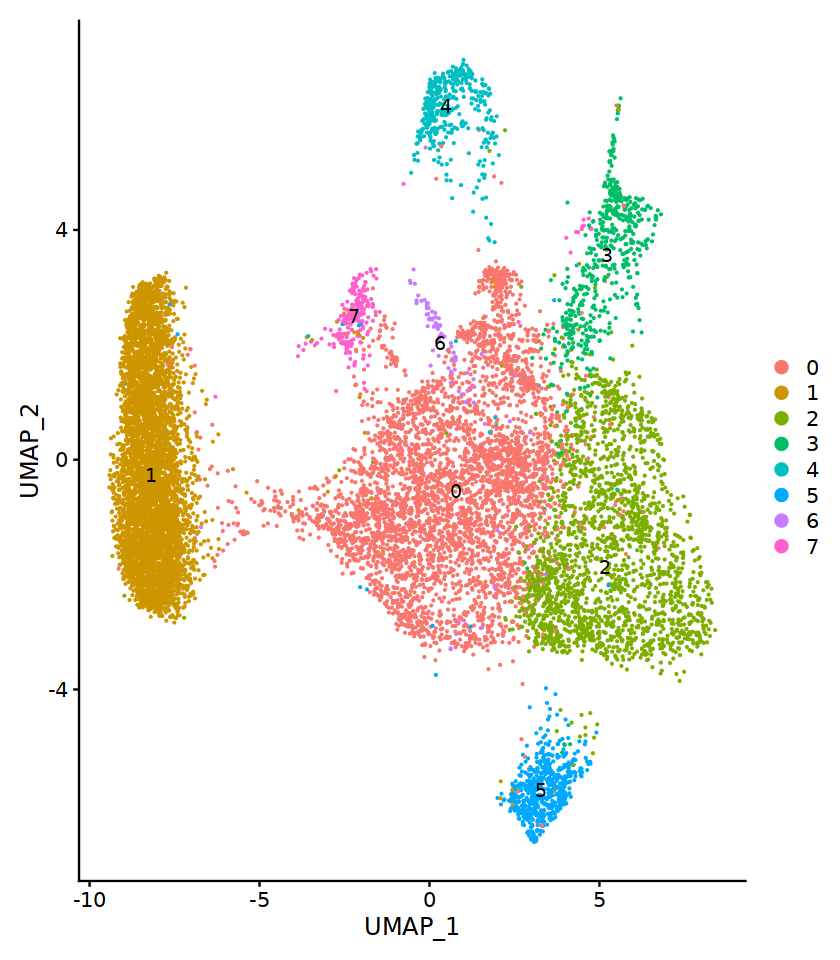

In [301]:
DimPlot(sce,label = T)

In [200]:
ggsave('res.umap1.pdf',width = 6,height = 5)

In [302]:
getwd()

[1] "/import/DB/workdir/cd40"

In [145]:
table(sce$orig.ident,sce$seurat_clusters)

      
          0    1    2    3    4    5    6    7    8    9
  KO3d  850 4607  738  209   92   78   19   65   84   74
  WT3d 2969  283 1357  309  290  508   64  156  111  102

In [146]:
sce$seurat_clusters = gsub(9,0,sce$seurat_clusters)

In [147]:
sce$seurat_clusters = gsub(8,0,sce$seurat_clusters)

In [148]:
table(sce$orig.ident,sce$seurat_clusters)

      
          0    1    2    3    4    5    6    7
  KO3d 1008 4607  738  209   92   78   19   65
  WT3d 3182  283 1357  309  290  508   64  156

In [149]:
sce$seurat_clusters = factor(sce$seurat_clusters,levels = c(0,1,2,3,4,5,6,7))
Idents(sce) = 'seurat_clusters'

In [ ]:
saveRDS(sce,file = 'merge.89.to0.rds')

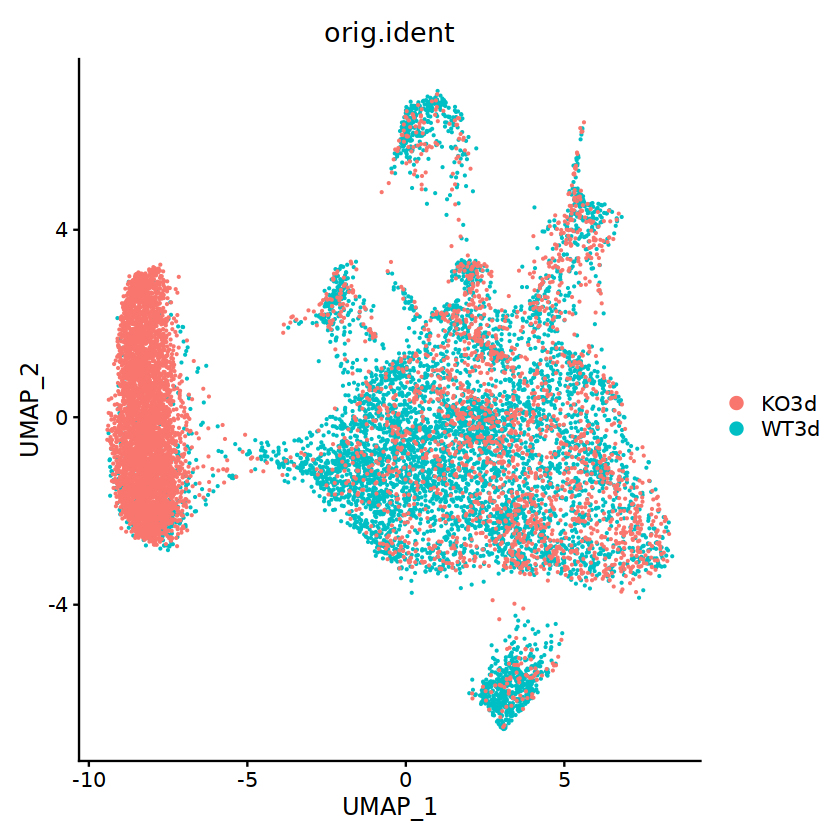

In [202]:
DimPlot(sce,group.by = 'orig.ident')

In [203]:
ggsave('res.umap2.pdf',width = 6,height = 5)

In [204]:
Idents(sce) = 'orig.ident'

In [205]:
scRNA =subset(sce,idents = c('KO3d','WT3d'))


KO3d WT3d 
6816 6149 


          0           1           2           3           4           5 
0.323177786 0.377169302 0.161588893 0.039953722 0.029463941 0.045198612 
          6           7 
0.006401851 0.017045893 

   
    KO3d WT3d
  0 1008 3182
  1 4607  283
  2  738 1357
  3  209  309
  4   92  290
  5   78  508
  6   19   64
  7   65  156

Warning message:
"package 'ggalluvial' was built under R version 4.2.3"


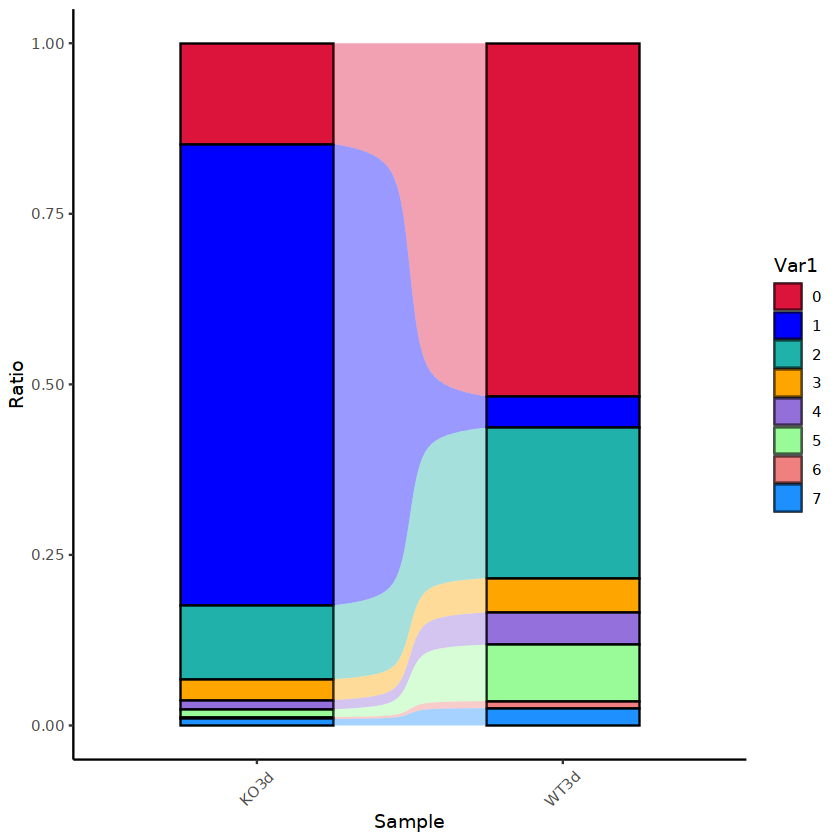

In [206]:
Idents(scRNA) ='seurat_clusters'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('KO3d',  'WT3d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
# ggplot(Cellratio) + 
#   geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
#   theme_classic() +
#   labs(x='Sample',y = 'Ratio')+
#   scale_fill_manual(values = allcolour)+
#   theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [207]:
ggsave('res.ratio.pdf',width = 6,height = 5)

## 描述 0和1的富集情况

In [32]:
Idents(sce) = 'seurat_clusters'
DefaultAssay(sce) = 'RNA'


sce.markers <- FindAllMarkers(object = sce, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = c0.gene, fromType = "SYMBOL", toType = c("ENTREZID"), :
"0.73% of input gene IDs are fail to map..."


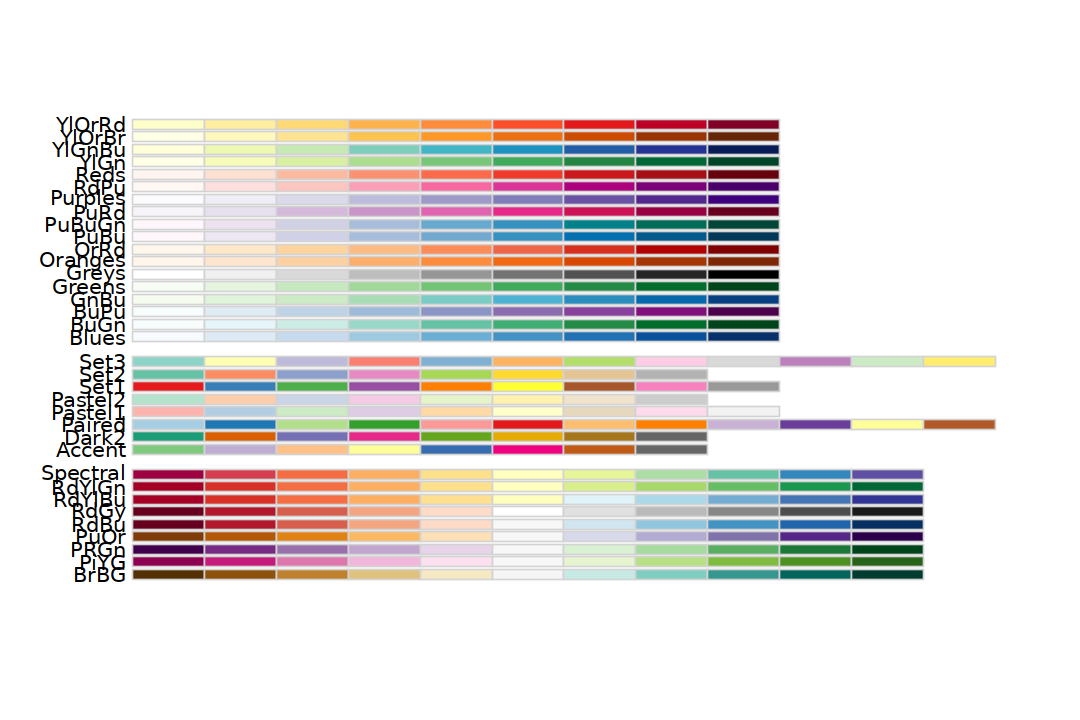

In [329]:
c0.gene = sce.markers %>%  filter(cluster == 0) %>% rownames()

library(clusterProfiler)
library(org.Mm.eg.db)

gene_symbol <- bitr(geneID = c0.gene,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Mm.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Mm.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

write.csv(BP@result,file = 'c0.high.expr.gene.csv')

 BP %>% filter(ONTOLOGY	 == 'BP') %>% head(10) -> bp
 BP %>% filter(ONTOLOGY	 == 'CC') %>% head(10) -> cc
 BP %>% filter(ONTOLOGY	 == 'MF') %>% head(10) -> mf

go = rbind(bp,cc,mf)

library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=10)

go$Description<- factor(go$Description,levels=go$Description)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


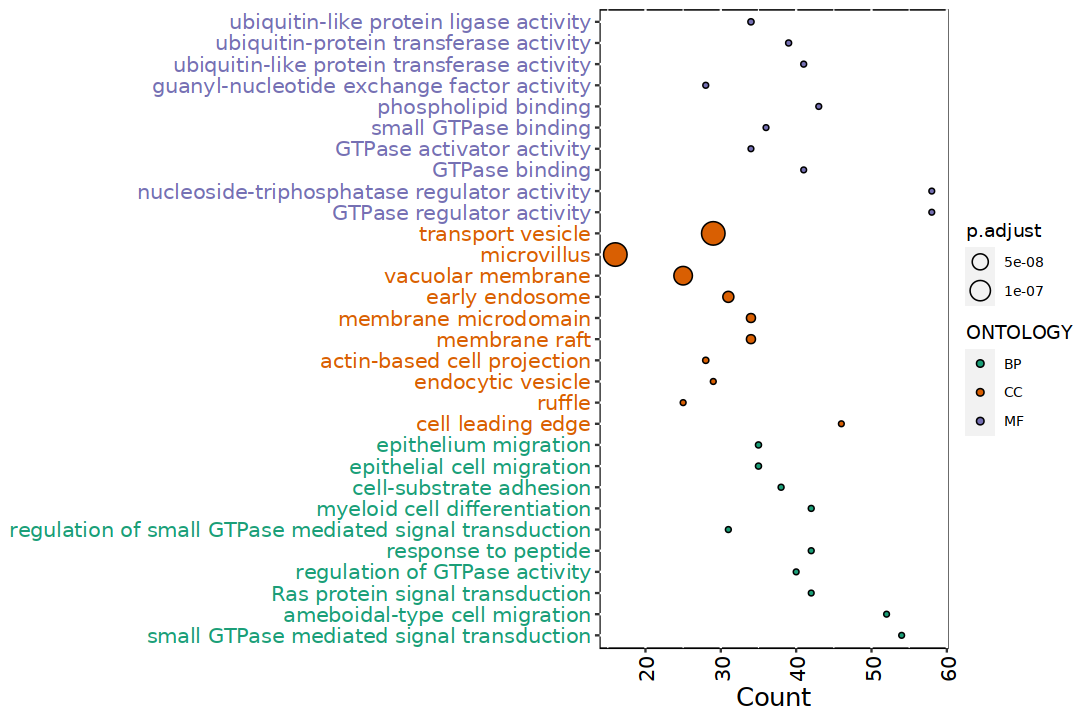

In [330]:
options(repr.plot.width = 9,repr.plot.height = 6)

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY,size=p.adjust) +
  geom_point(shape=21,color="black") +
  #scale_fill_hue() +
  xlab("Counts")+
  scale_fill_manual(values =color)+
  coord_flip()+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 90,hjust=1,vjust=0.6),
    axis.title.y = element_blank(),
    axis.text.y = element_text(colour = colorl),
    #legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    #legend.direction = "horizontal",
    #legend.position = c(0.5,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    plot.background = element_blank()
  )

ggsave('res.c0.gene.go.enrich.pdf',width = 8,height = 6)

In [331]:
library(enrichplot)

ek <- enrichKEGG(gene =gene , 
                   organism = "mmu",  
                   pvalueCutoff =1, 
                   qvalueCutoff = 1) 
    keggres = ek@result
write.csv(keggres,file = 'res.co.gene.kegg_results.csv')

mixedToFloat <- function(x){
    x <- sapply(x, as.character)
    is.integer  <- grepl("^-?\\d+$", x)
    is.fraction <- grepl("^-?\\d+\\/\\d+$", x)
    is.float <- grepl("^-?\\d+\\.\\d+$", x)
    is.mixed    <- grepl("^-?\\d+ \\d+\\/\\d+$", x)
    stopifnot(all(is.integer | is.fraction | is.float | is.mixed))
    
    numbers <- strsplit(x, "[ /]")
    
    ifelse(is.integer,  as.numeric(sapply(numbers, `[`, 1)),
           ifelse(is.float,    as.numeric(sapply(numbers, `[`, 1)),
                  ifelse(is.fraction, as.numeric(sapply(numbers, `[`, 1)) /
                             as.numeric(sapply(numbers, `[`, 2)),
                             as.numeric(sapply(numbers, `[`, 1)) +
                             as.numeric(sapply(numbers, `[`, 2)) /
                             as.numeric(sapply(numbers, `[`, 3)))))
}

keggres$GeneRatio = mixedToFloat(keggres$GeneRatio)

 library (dplyr)
library (tidyr)

keggres = keggres %>% separate(Description, c('Description', ' col2 '),sep = '-')

Warning message:
"Expected 2 pieces. Additional pieces discarded in 60 rows [6, 21, 49, 51, 54,
62, 65, 66, 70, 81, 83, 84, 89, 90, 97, 99, 100, 101, 102, 107, ...]."


In [341]:
keggres1 = keggres[c(1:20),]

In [372]:
keggres2 = keggres1[order(keggres1$p.adjust,decreasing = T),]

In [375]:

keggres2$Description<- factor(keggres2$Description,levels=keggres2$Description)

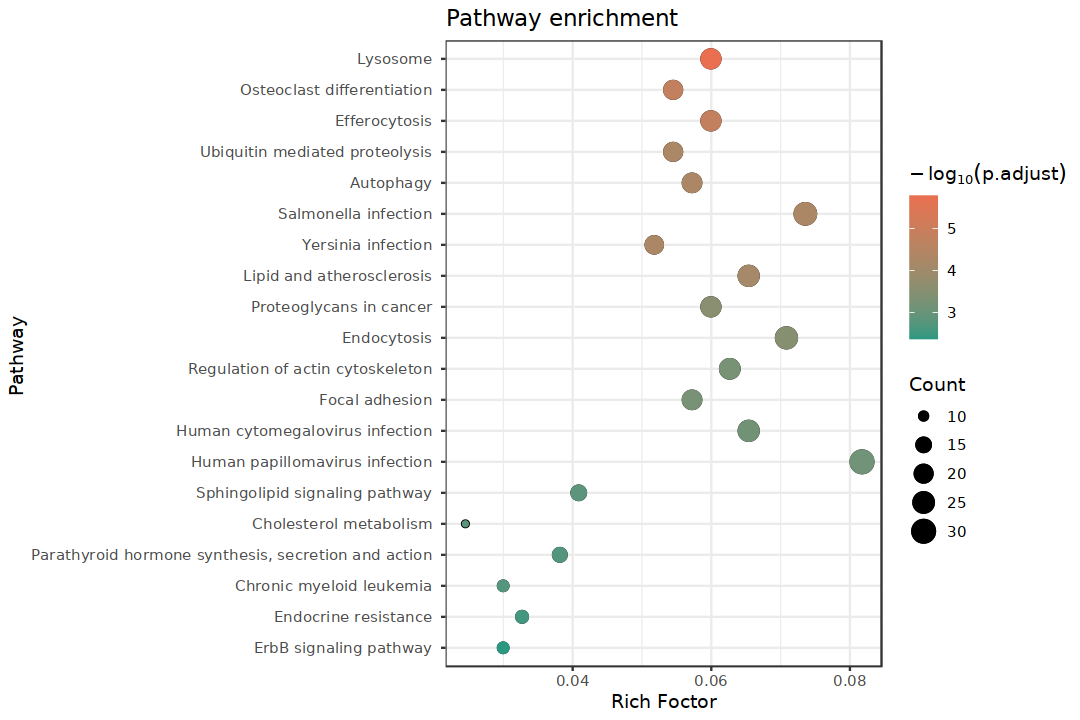

In [376]:
p = ggplot(keggres2,aes(GeneRatio	,Description))
p=p + geom_point()  
p=p + geom_point(aes(size=Count))
pbubble = p+ geom_point(aes(size=Count,color=-1*log10(p.adjust)))
pr = pbubble+scale_color_gradient(low="#2B9882",high = "#E96F50")
pr = pr+labs(color=expression(-log[10](p.adjust)),size="Count",  
                        x="Rich Foctor",y="Pathway ",title="Pathway enrichment")
pr + theme_bw()

ggsave('res.c0.gene.kegg.enrich.pdf',width = 8,height = 6)

## c1.gene

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = c1.gene, fromType = "SYMBOL", toType = c("ENTREZID"), :
"3.45% of input gene IDs are fail to map..."
Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


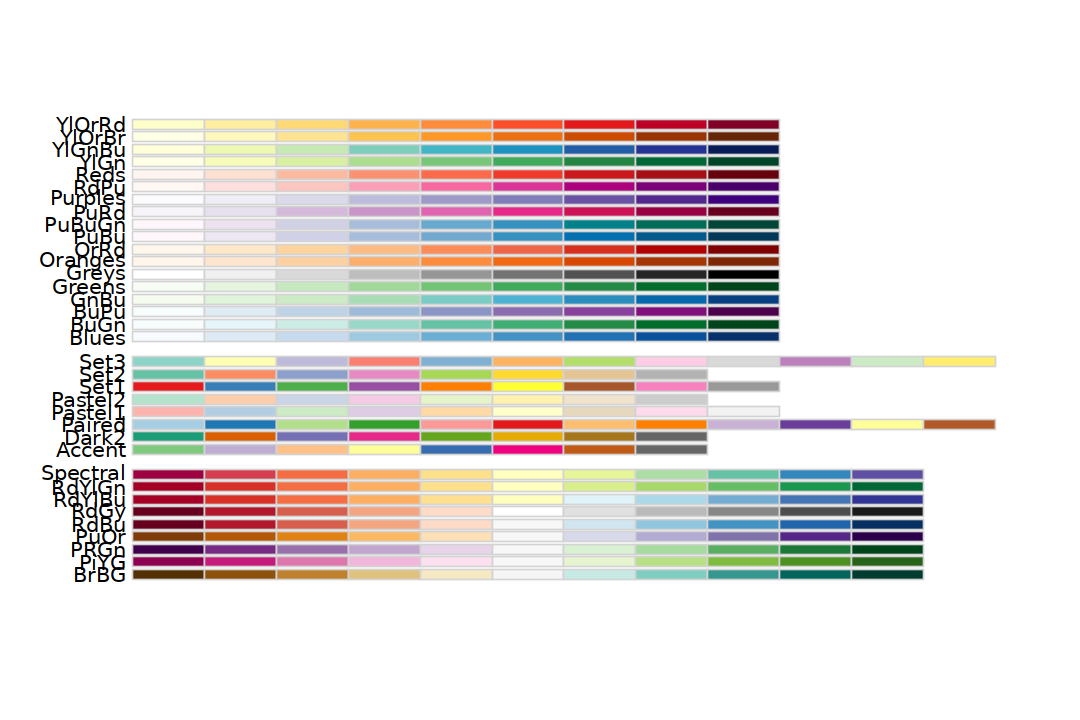

Warning message:
"Expected 2 pieces. Additional pieces discarded in 38 rows [2, 10, 12, 13, 18,
29, 34, 47, 54, 55, 62, 73, 74, 76, 78, 81, 93, 103, 107, 115, ...]."


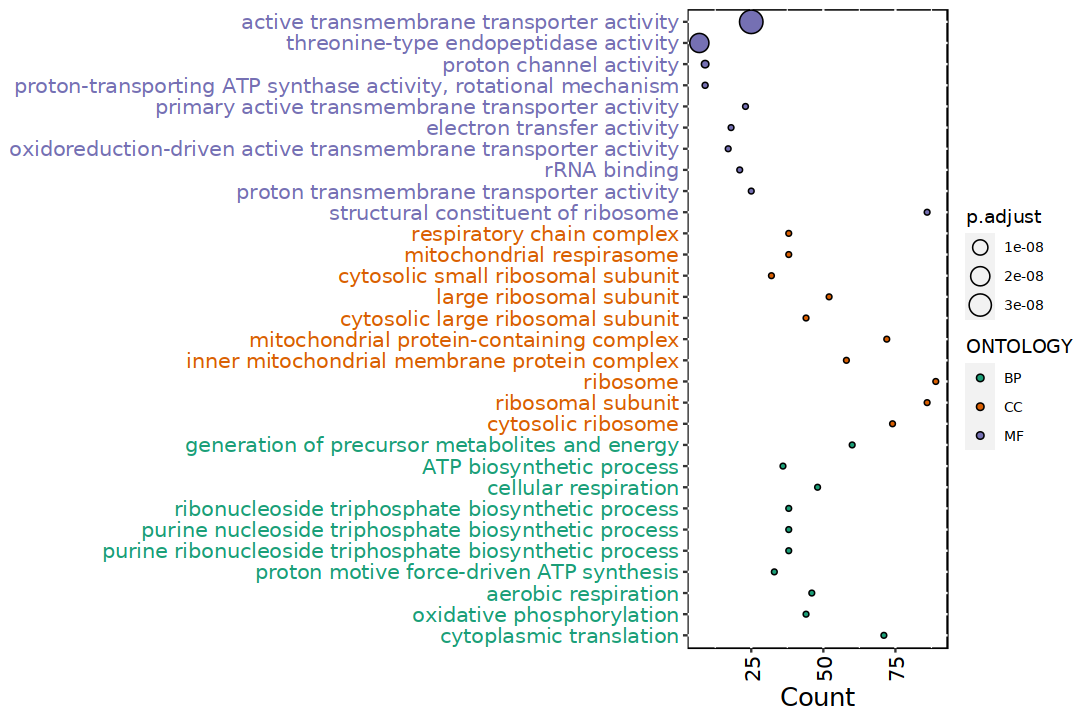

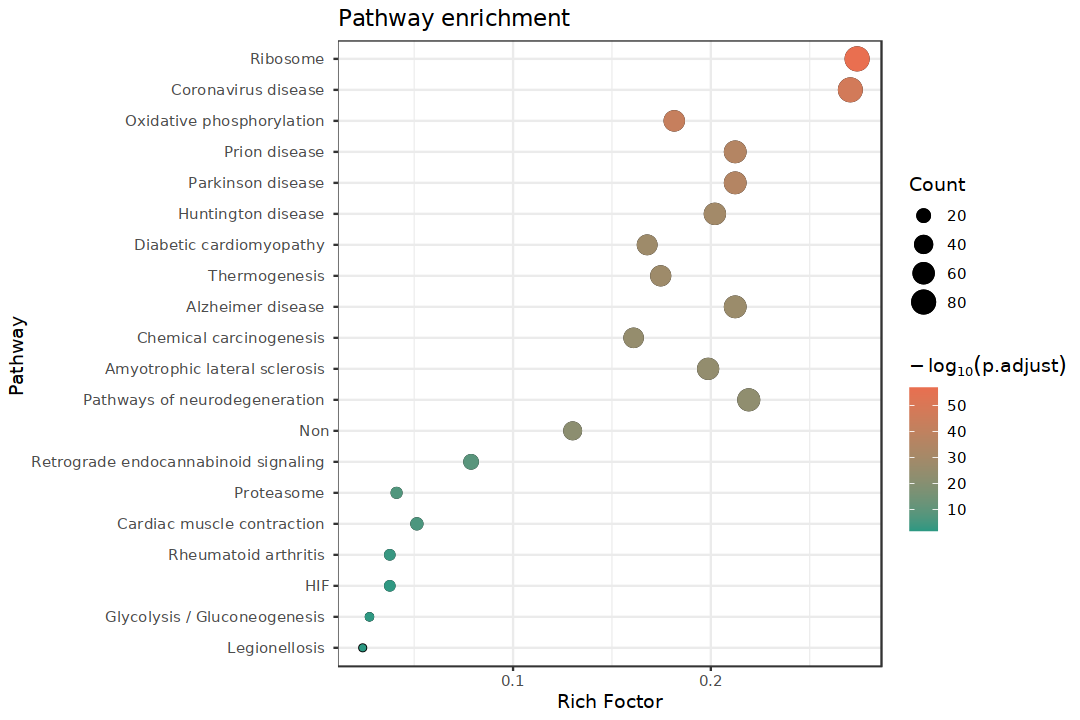

In [378]:
c1.gene = sce.markers %>%  filter(cluster == 1) %>% rownames()

gene_symbol <- bitr(geneID = c1.gene,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Mm.eg.db")
gene <- gene_symbol[,2]
BP <- enrichGO(gene = gene,  
               keyType = "ENTREZID",  
               OrgDb=org.Mm.eg.db,  
               ont = "ALL",   
               pvalueCutoff = 0.05,  
               pAdjustMethod = "fdr", 
               minGSSize = 5,   
               maxGSSize = 500,  
               qvalueCutoff = 0.05,  
               readable = TRUE) 

write.csv(BP@result,file = 'c1.high.expr.gene.csv')

 BP %>% filter(ONTOLOGY	 == 'BP') %>% head(10) -> bp
 BP %>% filter(ONTOLOGY	 == 'CC') %>% head(10) -> cc
 BP %>% filter(ONTOLOGY	 == 'MF') %>% head(10) -> mf

go = rbind(bp,cc,mf)

library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=10)

go$Description<- factor(go$Description,levels=go$Description)

options(repr.plot.width = 9,repr.plot.height = 6)

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY,size=p.adjust) +
  geom_point(shape=21,color="black") +
  #scale_fill_hue() +
  xlab("Counts")+
  scale_fill_manual(values =color)+
  coord_flip()+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 90,hjust=1,vjust=0.6),
    axis.title.y = element_blank(),
    axis.text.y = element_text(colour = colorl),
    #legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    #legend.direction = "horizontal",
    #legend.position = c(0.5,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    plot.background = element_blank()
  )

ggsave('res.c1.gene.go.enrich.pdf',width = 9,height = 6)

library(enrichplot)

ek <- enrichKEGG(gene =gene , 
                   organism = "mmu",  
                   pvalueCutoff =1, 
                   qvalueCutoff = 1) 
    keggres = ek@result
write.csv(keggres,file = 'res.c1.gene.kegg_results.csv')

mixedToFloat <- function(x){
    x <- sapply(x, as.character)
    is.integer  <- grepl("^-?\\d+$", x)
    is.fraction <- grepl("^-?\\d+\\/\\d+$", x)
    is.float <- grepl("^-?\\d+\\.\\d+$", x)
    is.mixed    <- grepl("^-?\\d+ \\d+\\/\\d+$", x)
    stopifnot(all(is.integer | is.fraction | is.float | is.mixed))
    
    numbers <- strsplit(x, "[ /]")
    
    ifelse(is.integer,  as.numeric(sapply(numbers, `[`, 1)),
           ifelse(is.float,    as.numeric(sapply(numbers, `[`, 1)),
                  ifelse(is.fraction, as.numeric(sapply(numbers, `[`, 1)) /
                             as.numeric(sapply(numbers, `[`, 2)),
                             as.numeric(sapply(numbers, `[`, 1)) +
                             as.numeric(sapply(numbers, `[`, 2)) /
                             as.numeric(sapply(numbers, `[`, 3)))))
}

keggres$GeneRatio = mixedToFloat(keggres$GeneRatio)

 library (dplyr)
library (tidyr)

keggres = keggres %>% separate(Description, c('Description', ' col2 '),sep = '-')


keggres1 = keggres[c(1:20),]
keggres2 = keggres1[order(keggres1$p.adjust,decreasing = T),]

keggres2$Description<- factor(keggres2$Description,levels=keggres2$Description)

p = ggplot(keggres2,aes(GeneRatio	,Description))
p=p + geom_point()  
p=p + geom_point(aes(size=Count))
pbubble = p+ geom_point(aes(size=Count,color=-1*log10(p.adjust)))
pr = pbubble+scale_color_gradient(low="#2B9882",high = "#E96F50")
pr = pr+labs(color=expression(-log[10](p.adjust)),size="Count",  
                        x="Rich Foctor",y="Pathway ",title="Pathway enrichment")
pr + theme_bw()

ggsave('res.c1.gene.kegg.enrich.pdf',width = 8,height = 6)

## 气泡图

In [268]:
library(dplyr)
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
library(ggplot2)

In [269]:
gene = unique(top5$gene)

In [ ]:
gene1 = rev(c('Cd36', 'Gpnmb',  'Fabp5', 'Dennd1a', 'Lgmn', 'Lpl', 'Mertk'))
gene[c(1:7)]= gene1

In [272]:
gene

[1] "Mertk"    "Lpl"      "Lgmn"     "Dennd1a"  "Fabp5"    "Gpnmb"   
 [7] "Cd36"     "Rpl38"    "Rpl41"    "Ifi27l2a" "Plac8"    "Ms4a4c"  
[13] "Plcb1"    "Thbs1"    "Ly6c2"    "H2-Eb1"   "H2-Ab1"   "H2-Aa"   
[19] "Cd74"     "Phlpp1"   "Gm42418"  "Gm26917"  "Cmss1"    "Lars2"   
[25] "Gphn"     "Acod1"    "G0s2"     "S100a9"   "S100a8"   "Antxr2"  
[31] "Ltc4s"    "Fn1"      "Arg1"     "Egr1"     "Saa3"     "Pclaf"   
[37] "Top2a"    "Birc5"    "Stmn1"    "Tubb5"

In [274]:
Idents(sce) = 'seurat_clusters'

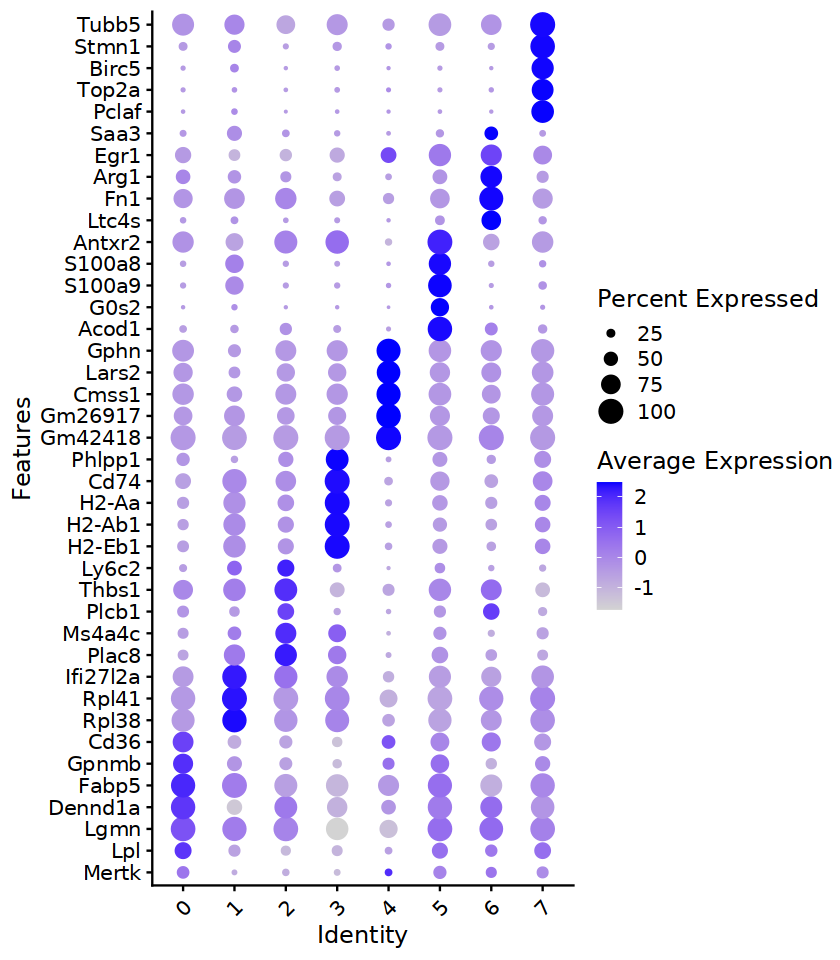

In [278]:
options(repr.plot.height = 8,repr.plot.width = 7)
# n1 = replace(unique(top5$gene),11:13,c('Cd14','Vcan','Ly6c2'))
# n2 = replace(n1,16:17,c('Spp1','Gpnmb'))
# n3 = replace(n2,40,c('Xcr1'))
DotPlot(sce, features =gene,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [279]:
ggsave('res.marker.pdf',width = 7,height = 8)

In [379]:
getwd()

[1] "/import/DB/workdir/cd40"

In [74]:
write.csv(sce.markers,file = 'merge.8.9.two.sample.csv')

In [78]:
outdaa = readRDS('/import/DB//workdir/cd40/outdata/outsider.3d.7d.aim.to.C0.rds')

In [81]:
Idents(outdaa) = 'seurat_clusters'

In [82]:
C0 = subset(outdaa,idents =  0)

In [151]:
saveRDS(sce,file = 'merge.8.9.to.0.rds')

In [136]:
table(sce$seurat_clusters)


   0    1    2    3    4    5    6    7 
4190 4890 2095  518  382  586   83  221 

In [289]:
C0$seurat_clusters = 'pre_reparative_macro'

In [290]:
scrna = merge(C0,sce)

In [291]:
table(scrna$seurat_clusters)


                   0                    1                    2 
                4190                 4890                 2095 
                   3                    4                    5 
                 518                  382                  586 
                   6                    7 pre_reparative_macro 
                  83                  221                 1512 

In [292]:
DefaultAssay(scrna) = 'RNA'

In [293]:
library(pheatmap)
Idents(scrna)<- scrna$seurat_clusters
av.exp<- AverageExpression(scrna)$RNA
# av.exp<- av.exp[which(row.names(av.exp)%in% features),]

features=names(tail(sort(apply(av.exp, 1, sd)),5000))
av.exp<- av.exp[which(row.names(av.exp)%in% features),]
av.exp <- cor(av.exp, method= "pearson")


In [294]:
bk <- c(seq(0.7,0.8,by=0.05),seq(0.8,0.9,by=0.05))

In [295]:
colnames(av.exp)

[1] "pre_reparative_macro" "0"                    "2"                   
[4] "1"                    "5"                    "7"                   
[7] "3"                    "4"                    "6"

In [321]:
dev.off()

pdf 
  3

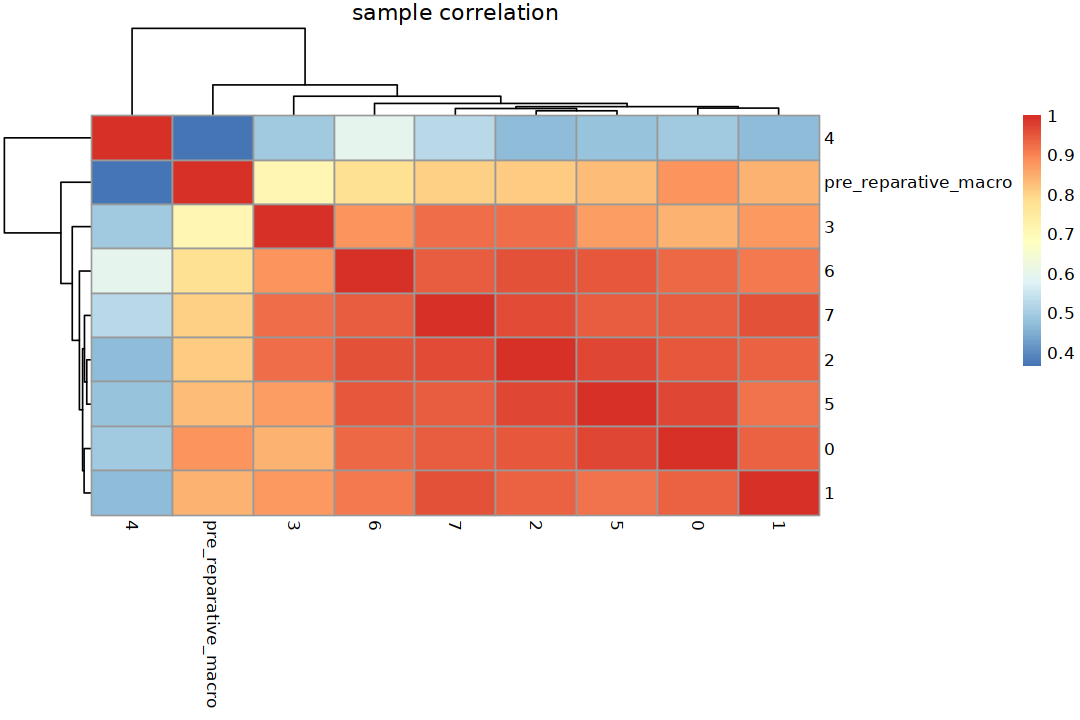

In [324]:
p = pheatmap::pheatmap(av.exp,main = 'sample correlation')

In [325]:
pdf('outdata.cor.to.repair.c0.pdf',height = 6,width =  7)

print(p)
dev.off()

png 
  2

In [319]:
getwd()


[1] "/import/DB/workdir/cd40"

In [381]:
library(pheatmap)
Idents(scrna)<- scrna$seurat_clusters
av.exp<- AverageExpression(scrna)$RNA
# av.exp<- av.exp[which(row.names(av.exp)%in% features),]

features=names(tail(sort(apply(av.exp, 1, sd)),5000))
av.exp<- av.exp[which(row.names(av.exp)%in% features),]

In [388]:
av.exp = av.exp %>%  as.data.frame()

In [389]:
colnames(av.exp)[2] = 'c0'

`geom_smooth()` using formula = 'y ~ x'


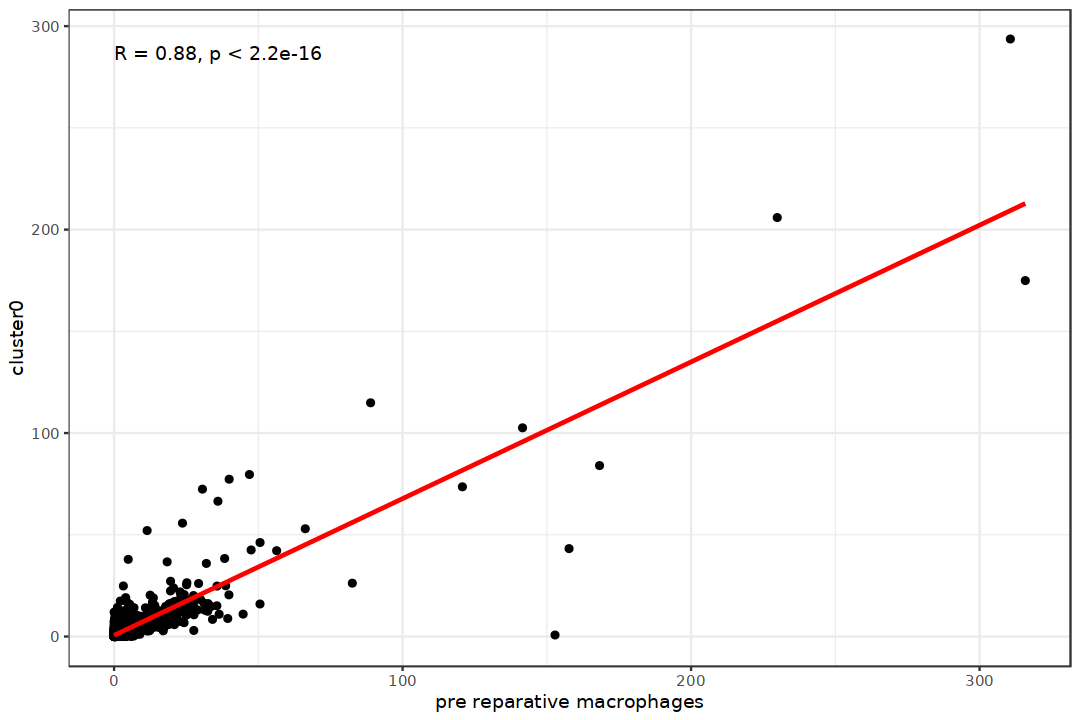

In [392]:
library(ggplot2)
library(ggpubr)
ggplot(av.exp, aes(x=av.exp$pre_reparative_macro, y=av.exp$c0)) + 
  geom_point()+ geom_smooth(method = 'lm', se = F, color = 'red')+
theme_bw()+stat_cor(data=av.exp, method = "pearson")+xlab('pre reparative macrophages')+
ylab('cluster0')

In [393]:
ggsave('corr.cell.pdf',width = 6,height = 6)

`geom_smooth()` using formula = 'y ~ x'


In [394]:
getwd()

[1] "/import/DB/workdir/cd40"